## Recréer Tensorflow

In [2]:
import numpy as np

In [3]:
class Boite():
    
    def __init__(self):        
        pass
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = self.operation()
        return self.output
    
    def backward(self, deriv_out):        
        assert deriv_out.shape == self.output.shape, f"Le shape de la dérivé output reçu {deriv_out.shape} est différent de celui de output {self.output.shape}"
        
        self.deriv_inp = self.gradient(deriv_out)
        assert self.deriv_inp.shape == self.inputs.shape, f"Le shape de la dérivé input de sortir {self.deriv_inp.shape} est différent de celui de input {self.inputs.shape}"
        
        return self.deriv_inp
    
    def operation(self):
        pass
    
    def gradient(self, deriv_out):
        pass

In [4]:
class BoiteParam():  
    # Pour grad et grad_param parce que les classent qui hériteront de BoiteParam sont fait d'une operation(soit prod Matriciel, soit addition). et faut calculer le gradient de chacun de ces 2 paramettre
    
    def __init__(self, param):        
        self.param = param
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = self.operation()
        return self.output
    
    def backward(self, deriv_out):        
        assert deriv_out.shape == self.output.shape, f"Le shape de la dérivé output reçu {deriv_out.shape} est différent de celui de output {self.output.shape}"
        
        self.deriv_inp = self.gradient(deriv_out)        
        assert self.deriv_inp.shape == self.inputs.shape, f"Le shape de la dérivé input de sortir {self.deriv_inp.shape} est différent de celui de input {self.input.shape}"
        
        self.deriv_param = self.gradient_param(deriv_out)
        # S'assurer que la dérivé de param et param aient le même shape
        assert self.deriv_param.shape == self.param.shape, f"Le shape de la dérivé de param {self.deriv_param.shape} est différent de celui de param {self.param.shape}"
        return self.deriv_inp
    
    def operation(self):
        pass
    
    def gradient(self, deriv_out):  # La dérivé par rapport à l'input
        pass
    
    def gradient_param(self, deriv_out):  # La dérivé par rapport aux parametres
        pass

### La classe Dot

In [5]:
class Dot(BoiteParam):
    def __init__(self, weight):        
        super().__init__(weight)
        
    def operation(self):  # M = X.W(produit matriciel)
        return np.dot(self.inputs, self.param)
    
    def gradient(self, deriv_out):  # dM_dX = W.T (dM_dX :deriv de M par rapport à X)  # La dérivé par rapport à l'input
        # la derivé d'un produit Matriciel est la transposé
        # Maintenant la transposé * l'entré du gradient(vu qu'on est en backward ça fait les dérivés antérieurs)
        return np.dot(deriv_out, self.param.T)
    
    def gradient_param(self, deriv_out):  # dM_dW = X.T  # La dérivé par rapport aux parametres
        return np.dot( self.inputs.T, deriv_out)
    
    def __repr__(self):
        return "DotProduct"

In [6]:
X = np.array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])
X.shape

(4, 3)

In [7]:
W = np.array([[ 0.49671415],
 [-0.1382643 ],
 [ 0.64768854]])
W.shape

(3, 1)

In [8]:
np.dot(X, W)

array([[-0.71674168],
       [ 0.64784656],
       [-0.81703373],
       [ 1.89943266]])

In [9]:
M = Dot(weight=W)
output = M.forward(X)
output

array([[-0.71674168],
       [ 0.64784656],
       [-0.81703373],
       [ 1.89943266]])

In [10]:
M

DotProduct

In [11]:
d_out = np.random.randn(4, 1)
d_out

array([[-0.67795547],
       [-0.11943094],
       [ 1.12312353],
       [ 0.83051325]])

In [12]:
M.backward(d_out)

array([[-0.33675008,  0.09373704, -0.43910399],
       [-0.05932304,  0.01651304, -0.07735405],
       [ 0.55787135, -0.15528789,  0.72743424],
       [ 0.41252768, -0.11483033,  0.53791392]])

### La classe ADD

In [13]:
class Add(BoiteParam):
    def __init__(self, biais):        
        super().__init__(biais)
        
    def operation(self):  # P = M + B
        return self.inputs + self.param
    
    def gradient(self, deriv_out):  # dP_dB = 1 (1,)
        # afin de reshape on utilise np.ones_like
        return np.ones_like(self.inputs) * deriv_out
    
    def gradient_param(self, deriv_out):  # dP_dM = 1 shape: (1,)
        r = np.ones_like(self.param) * deriv_out
        return r.sum(axis=0).reshape(1, self.param.shape[1])
    
    def __repr__(self):
        return "AddBiais"

In [14]:
b = np.random.rand(1, 1)
b

array([[0.07644685]])

In [15]:
B = Add(biais=b)
B

AddBiais

In [16]:
out_b = B.forward(output)
out_b

array([[-0.64029483],
       [ 0.72429341],
       [-0.74058688],
       [ 1.97587951]])

In [17]:
d_out

array([[-0.67795547],
       [-0.11943094],
       [ 1.12312353],
       [ 0.83051325]])

In [18]:
B.backward(d_out)

array([[-0.67795547],
       [-0.11943094],
       [ 1.12312353],
       [ 0.83051325]])

### La classe Sigmoid

In [19]:
class Sigmoid(Boite):
    def __init__(self):        
        super().__init__()
        
    def operation(self):
        return 1 / (1 + np.exp(-1 * self.inputs))
    
    def gradient(self, deriv_out):
        return (self.output * (1 - self.output)) * deriv_out
    
    def __repr__(self):
        return "Sigmoid"

In [20]:
sig = Sigmoid()
sig

Sigmoid

In [21]:
out_sig = sig.forward(out_b)
out_sig

array([[0.3451799 ],
       [0.67355175],
       [0.32287582],
       [0.87824123]])

In [22]:
sig.backward(d_out)

array([[-0.15323877],
       [-0.02626045],
       [ 0.24554516],
       [ 0.08880975]])

### La Classe Loss

In [23]:
class Loss():
    
    def __init__(self):
        pass
    
    def forward(self, prediction, target): 
        assert target.shape == prediction.shape
        self.target = target
        self.prediction = prediction
        loss = np.mean((self.target - self.prediction) **2) 
        return loss
    
    def backward(self):
        
        self.deriv_loss = -2 * (self.target - self.prediction)
        assert self.deriv_loss.shape == self.prediction.shape, f"Le shape de la dérivé du loss est de {self.deriv_loss.shape} est différent de celui de la prediction {self.prediction.shape}"
        
        return self.deriv_loss
    
    def __repr__(self):
        return "loss"

In [24]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [25]:
X.shape

(4, 3)

In [26]:
Y = np.random.randn(4, 1)
Y

array([[ 2.26983511],
       [ 1.26019145],
       [ 0.59821539],
       [-1.00064104]])

In [27]:
# La prédiction c'est la sortir de sigmoid
P = out_sig
P

array([[0.3451799 ],
       [0.67355175],
       [0.32287582],
       [0.87824123]])

In [28]:
mse = Loss()

In [29]:
mse.forward(Y, P)

1.9136135647077452

In [30]:
mse.backward()

array([[ 3.84931042],
       [ 1.17327939],
       [ 0.55067913],
       [-3.75776453]])

### La classe Dense

In [62]:
# Dense parce que les couches sont densements connectées
# Chaque neurone est une régression linéaire**

class Dense():  # Ici Dense représente une couche
    
    def __init__(self, neurons, activation=None):
        self.neurons = neurons
        self.activation = activation  # Pour sigmoid. En sachant que sigmoid n'est pas appliqué à la dernière couche
        self.param = []  # Pour stocker weight et biais
        self.suite = []  # Pour stocker nos opération successives(une Couche)
        self.init = True  # Pour que weight et biais(build) ne soient initialisés qu'une seul fois
        
    def build(self, inputs):
        # Weight & Biais initialization aléatoire
        np.random.seed(42)
        
        self.weight = np.random.randn(inputs.shape[1], self.neurons)
        self.biais = np.random.randn(1, self.neurons)
        
        # Sauvegarde du weight & biais
        self.param.append(self.weight)
        self.param.append(self.biais)
        
        # Construction de la suite d'opération
        self.suite = [Dot(self.param[0]), Add(self.param[1])]
        if self.activation:
            self.suite.append(self.activation)
        
        
    def forward(self, inputs):
        if self.init:
            self.build(inputs)
            self.init = False
            
        for boite in self.suite:
            inputs = boite.forward(inputs)
            
        self.output = inputs
        
        return self.output
    
    
    def backward(self, deriv_out):        
        assert deriv_out.shape == self.output.shape
        
        for Boite in reversed(self.suite):  # self.suite[::-1]
            deriv_out = Boite.backward(deriv_out)
        
        deriv_input = deriv_out
        self.get_deriv_param()
        return deriv_input
    
    
    def get_deriv_param(self):  # Sauvegarde des deriv_params
        self.deriv_params = []
        
        for boite in self.suite:
            if issubclass(boite.__class__, BoiteParam):
                self.deriv_params.append(boite.deriv_param)
    
    def __repr__(self):
        r = f"DenseLayer(neurones = {self.neurons})"
        if self.activation:
            r += " avec Sigmoid"
            
        return r
    

In [63]:
sigmoid = Sigmoid()

In [64]:
couche = Dense(neurons=2, activation=sigmoid)
couche

DenseLayer(neurones = 2) avec Sigmoid

In [34]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [35]:
couche.forward(X)

array([[0.99320003, 0.99604286],
       [0.99912347, 0.99968533],
       [0.42276305, 0.97817014],
       [0.97978765, 0.99941659]])

In [36]:
out_c = np.random.randn(4, 2)
out_c

array([[-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753]])

In [37]:
couche.param

[array([[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696]]),
 array([[1.57921282, 0.76743473]])]

In [38]:
couche.backward(out_c)

array([[-0.00187061,  0.00120335,  0.00024173],
       [-0.00018133, -0.00048599,  0.00012933],
       [ 0.03497832, -0.02397904, -0.00426045],
       [-0.0169224 , -0.02262434,  0.00807543]])

In [75]:
from copy import deepcopy

### La classe Model

In [76]:
class Model():
    
    def __init__(self, layers):
        self.layers = layers
        self.compiled = False
        
    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
            
        self.output = inputs
        
        return self.output

    def backward(self, loss_deriv):
        assert loss_deriv.shape == self.output.shape
        
        for layer in reversed(self.layers):  # self.suite[::-1]
            loss_deriv = layer.backward(loss_deriv)
             
        return None
    
    def get_params(self):
        #self.params = []
        
        for layer in self.layers:
            #self.params.append(layer.param)
            yield from layer.param  # yield from permet de récup les elts d'une liste un à un
            
            
        #return self.params
    
    
    def get_deriv_params(self):
        #self.deriv_params = []
        
        for layer in self.layers:
            #self.deriv_params.append(layer.deriv_params)
            yield from layer.deriv_params  # yield from permet de récup les elts d'une liste un à un
            
        #return self.deriv_params
    
    
    def update(self):  # Update des parametres
        
        for param, deriv_param in zip(self.get_params(), self.get_deriv_params()):  # Zip permet d'avoir les éléments 2 à 2
            # [1, 2, 3] & [4, 5, 6] en [1,4] [2, 5] [3, 6]
            assert param.shape == deriv_param.shape
            param -= self.learning_rate * deriv_param
    
    def compile(self, loss, learning_rate): #  Initialisation du loss
        self.loss = loss
        self.learning_rate = learning_rate
        self.compiled = True
    
    
    def fit(self, X, Y, epochs, validation_data=None):  # Pour entrainer sur plusieurs epochs
        # Validation_data pour la validation sur les données tests X_test, Y_test
        
        if validation_data:
            assert len(validation_data) == 2
            assert validation_data[0].shape[1] == X.shape[1]
            assert validation_data[1].shape[1] == Y.shape[1]
            
        self.history = {"loss": []}
        if validation_data:
            self.history["val_loss"] = []          
        
        
        if not self.compiled:
            raise NotImplementedError('Pas de loss et de learning_rate: Compilez')
        
        for epoch in range(epochs):
            # Forward
            prediction = self.forward(X)  # Contrib
            loss = self.loss.forward(prediction, Y)
            self.history["loss"].append(loss)
            
            # Validation
            if validation_data:                
                val_preds = self.forward(validation_data[0])  # Contrib
                val_loss = self.loss.forward(val_preds, validation_data[1])
                self.history["val_loss"].append(val_loss)
            
            affich = f'Epoch {epoch+1}......... loss : {loss}'
            if validation_data:
                affich += f'..... - val_loss : {val_loss}'               
                
            print(affich)
            

            #  backward
            loss_deriv = self.loss.backward()
            self.backward(loss_deriv)
            
            #  update
            self.update()
        
        return self.history
    
    def save_model(self, file):  # Sauvegarder notre model sous forme de fichier
        model_save = deepcopy(self)
        
        import pickle
        with open(file, "wb") as f:
            pickle.dump(model_save, f)        
            
    
    def __repr__(self):
        r = "Layers........"
        for layer in reversed(self.layers):
            r += f" \n {str(layer)}"
        return r
    

In [40]:
model = Model(layers=[Dense(neurons=3, activation=sigmoid), Dense(neurons=1)])
model

Layers........ 
 DenseLayer(neurones = 1) 
 DenseLayer(neurones = 3) avec Sigmoid

In [41]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [42]:
model.forward(X)

array([[2.47005633],
       [2.53479834],
       [1.89807891],
       [1.92678186]])

In [43]:
Y

array([[ 2.26983511],
       [ 1.26019145],
       [ 0.59821539],
       [-1.00064104]])

In [44]:
loss_deriv = np.random.randn(4, 1)
loss_deriv

array([[-0.23415337],
       [-0.23413696],
       [ 1.57921282],
       [ 0.76743473]])

In [45]:
model.backward(loss_deriv)

### Update des parametres

In [46]:
M

DotProduct

In [47]:
M.param

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

In [48]:
M.deriv_param

array([[-7.44925233],
       [ 3.7677922 ],
       [ 8.16676547]])

In [49]:
couche

DenseLayer(neurones = 2) avec Sigmoid

In [50]:
couche.param

[array([[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696]]),
 array([[1.57921282, 0.76743473]])]

In [51]:
couche.deriv_params

[array([[-0.30320043,  0.20796531],
        [-0.06424681, -0.07766607],
        [ 0.04724885, -0.1280065 ]]),
 array([[ 0.02131064, -0.03919074]])]

In [52]:
# model.get_params()

In [53]:
# model.get_deriv_params()

In [54]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [55]:
Y

array([[ 2.26983511],
       [ 1.26019145],
       [ 0.59821539],
       [-1.00064104]])

In [56]:
model = Model(layers=[Dense(neurons=2, activation=sigmoid), Dense(neurons=1)])

#  forward
P = model.forward(X)
mse = Loss()
loss = mse.forward(P, Y)
print(loss)

#  backward
loss_deriv = mse.backward()
model.backward(loss_deriv)

1.4178888417388604


In [57]:
model.update()

AttributeError: 'Model' object has no attribute 'learning_rate'

In [57]:

#  forward
P = model.forward(X)
mse = Loss()
loss = mse.forward(P, Y)
print(loss)


4.336579070378138


### Test de la fonction fit

In [59]:
model = Model(layers=[Dense(neurons=2, activation=sigmoid), Dense(neurons=1)])

mse = Loss()
model.compile(loss=mse, learning_rate=0.01)
model.fit(X, Y, epochs=10)

Epoch 1......... loss : 1.4178888417388604
Epoch 2......... loss : 1.4089180282355822
Epoch 3......... loss : 1.4034302960846796
Epoch 4......... loss : 1.400051365450056
Epoch 5......... loss : 1.3979502214214676
Epoch 6......... loss : 1.396623556755967
Epoch 7......... loss : 1.3957661510787358
Epoch 8......... loss : 1.3951927086036302
Epoch 9......... loss : 1.3947906258708875
Epoch 10......... loss : 1.3944914034426215


{'loss': [1.4178888417388604,
  1.4089180282355822,
  1.4034302960846796,
  1.400051365450056,
  1.3979502214214676,
  1.396623556755967,
  1.3957661510787358,
  1.3951927086036302,
  1.3947906258708875,
  1.3944914034426215]}

### Comparaison avec Tensorflow

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

lr = Sequential([Dense(units=2, activation='sigmoid'), Dense(units=2)])
lr.compile(optimizer=SGD(learning_rate=0.1), loss='mse')
history = lr.fit(X, Y, epochs=10)


2024-01-14 16:26:13.584041: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 16:26:13.792200: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-14 16:26:13.792237: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-14 16:26:14.655872: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

Epoch 1/10


2024-01-14 16:26:15.890643: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-14 16:26:15.890677: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-14 16:26:15.890714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elimson-HP-250-G7-Notebook-PC): /proc/driver/nvidia/version does not exist
2024-01-14 16:26:15.890979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 475ms/step - loss: 1.8651
Epoch 2/10
1/1 [==============================] - 0s 103ms/step - loss: 1.6483
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 1.4532
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 1.2739
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 1.1103
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.9687
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 0.8600
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.7833
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7283
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6872


### Validation

In [65]:
model = Model(layers=[Dense(neurons=2, activation=sigmoid), Dense(neurons=1)])

mse = Loss()
model.compile(loss=mse, learning_rate=0.01)
h = model.fit(X, Y, epochs=10, validation_data=(X, Y))

Epoch 1......... loss : 1.4178888417388604..... - val_loss : 1.4178888417388604
Epoch 2......... loss : 1.4089180282355822..... - val_loss : 1.4089180282355822
Epoch 3......... loss : 1.4034302960846796..... - val_loss : 1.4034302960846796
Epoch 4......... loss : 1.400051365450056..... - val_loss : 1.400051365450056
Epoch 5......... loss : 1.3979502214214676..... - val_loss : 1.3979502214214676
Epoch 6......... loss : 1.396623556755967..... - val_loss : 1.396623556755967
Epoch 7......... loss : 1.3957661510787358..... - val_loss : 1.3957661510787358
Epoch 8......... loss : 1.3951927086036302..... - val_loss : 1.3951927086036302
Epoch 9......... loss : 1.3947906258708875..... - val_loss : 1.3947906258708875
Epoch 10......... loss : 1.3944914034426215..... - val_loss : 1.3944914034426215


### Test sur le boston dataset

In [66]:
#  Session 2 section 43
import pandas as pd

url = "./boston.txt"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data = data
target = target

X = data
Y = target.reshape(506, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train.shape, Y_train.shape

((379, 13), (379, 1))

In [68]:
X_test.shape, Y_test.shape

((127, 13), (127, 1))

### Regression linéaire simple

In [74]:
zodel = Model([Dense(neurons=1)])

mse = Loss()
zodel.compile(loss=mse, learning_rate=0.001)
h = zodel.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test))

Epoch 1......... loss : 712.1743316753176..... - val_loss : 671.7547143671588
Epoch 2......... loss : 384.0837028693358..... - val_loss : 383.82786822291087
Epoch 3......... loss : 247.75414344252928..... - val_loss : 229.1941295737599
Epoch 4......... loss : 148.3806303920543..... - val_loss : 144.19534190777878
Epoch 5......... loss : 103.89520896898965..... - val_loss : 96.47739842280843
Epoch 6......... loss : 71.33479105168065..... - val_loss : 69.15302180485378
Epoch 7......... loss : 55.97937743045081..... - val_loss : 53.20253156199875
Epoch 8......... loss : 44.69041961018085..... - val_loss : 43.70966230146516
Epoch 9......... loss : 39.11541183660613..... - val_loss : 37.94536623883121
Epoch 10......... loss : 35.00552004305203..... - val_loss : 34.3691118394618
Epoch 11......... loss : 32.86685286102087..... - val_loss : 32.09754754821056
Epoch 12......... loss : 31.27998033095609..... - val_loss : 30.616578716256143
Epoch 13......... loss : 30.39111885607059..... - val_los

In [70]:
h.keys()

dict_keys(['loss', 'val_loss'])

In [71]:
import matplotlib.pyplot as plt

def plot_learning_curv(history):    
    plt.plot(list(range(len(history["loss"]))), history["loss"])
    plt.plot(list(range(len(history["val_loss"]))), history["val_loss"])
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Learning Curve")
    plt.show()

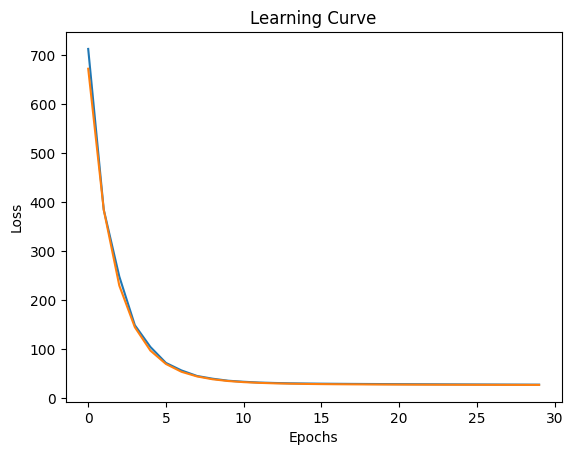

In [72]:
plot_learning_curv(h)

### Deep Neural Network

In [77]:
sigmoid = Sigmoid()
model = Model([Dense(neurons=13, activation=sigmoid), Dense(neurons=1)])
model

Layers........ 
 DenseLayer(neurones = 1) 
 DenseLayer(neurones = 13) avec Sigmoid

In [78]:
mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)
h = model.fit(X_train, Y_train, epochs=150, validation_data=(X_test, Y_test))

Epoch 1......... loss : 609.4535263872165..... - val_loss : 594.285047596059
Epoch 2......... loss : 494.7172454598782..... - val_loss : 479.0339597155269
Epoch 3......... loss : 403.8643944989146..... - val_loss : 388.125852443045
Epoch 4......... loss : 331.0559254119759..... - val_loss : 315.67394558965
Epoch 5......... loss : 272.44802631944543..... - val_loss : 257.80096535791387
Epoch 6......... loss : 225.32104126553727..... - val_loss : 211.7461595039089
Epoch 7......... loss : 187.60578616146617..... - val_loss : 175.37471756759948
Epoch 8......... loss : 157.62037539699094..... - val_loss : 146.91491099254424
Epoch 9......... loss : 133.9379615740088..... - val_loss : 124.84238208175846
Epoch 10......... loss : 115.33306807953525..... - val_loss : 107.84460906755527
Epoch 11......... loss : 100.76383198721742..... - val_loss : 94.8136613248053
Epoch 12......... loss : 89.36281102397759..... - val_loss : 84.83959359519152
Epoch 13......... loss : 80.42414713510476..... - val_l

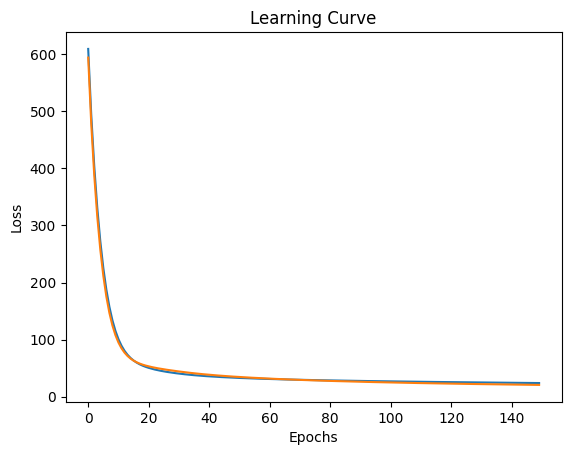

In [79]:
plot_learning_curv(h)

### Sauvegarde du Modele

In [80]:
sigmoid = Sigmoid()
model = Model([Dense(neurons=13, activation=sigmoid), Dense(neurons=1)])

mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)
h = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1......... loss : 609.4535263872165..... - val_loss : 594.285047596059
Epoch 2......... loss : 494.7172454598782..... - val_loss : 479.0339597155269
Epoch 3......... loss : 403.8643944989146..... - val_loss : 388.125852443045
Epoch 4......... loss : 331.0559254119759..... - val_loss : 315.67394558965
Epoch 5......... loss : 272.44802631944543..... - val_loss : 257.80096535791387
Epoch 6......... loss : 225.32104126553727..... - val_loss : 211.7461595039089
Epoch 7......... loss : 187.60578616146617..... - val_loss : 175.37471756759948
Epoch 8......... loss : 157.62037539699094..... - val_loss : 146.91491099254424
Epoch 9......... loss : 133.9379615740088..... - val_loss : 124.84238208175846
Epoch 10......... loss : 115.33306807953525..... - val_loss : 107.84460906755527


In [81]:
model.save_model('model.file')

### Charger le modele

In [82]:
import pickle

def load_model(file):
    with open(file, 'rb') as f:
        model_load = pickle.load(f)
    return model_load

In [83]:
model_charge = load_model("model.file")
model_charge  # Utilisable pour faire des prédictions

Layers........ 
 DenseLayer(neurones = 1) 
 DenseLayer(neurones = 13) avec Sigmoid